
# Статистические тесты
Представим, что перед полноценным запуском рекомендательной системы в онлайн-магазине мы протестировали её на части покупателей и увидели, что средний чек заказа вырос. 
Означает ли это, что мы увидим такой же результат и на других заказах? Можно ли запускать рекомендательную систему для всех покупателей?

Отвечать на подобные вопросы позволяет аппарат статистических тестов.

__Статистические тесты__ — один из наиболее важных инструментов в Data Science, который позволяет проверять гипотезы и принимать решения на основе данных. Благодаря статистическим тестам можно провести анализ и сделать вывод о том, являются ли различия между двумя выборками данных случайными или обусловленными каким-то влиянием.

Важно отметить, что статистические тесты не являются абсолютно надёжными и не всегда дают точные результаты. 
Кроме того, результаты статистических тестов могут зависеть от выбора метода и параметров, которые использовались при их проведении. 
Поэтому важно правильно выбирать тесты и использовать их в сочетании с другими методами анализа данных.

В ЭТОМ МОДУЛЕ МЫ РАЗБЕРЁМ:
- Что такое статистическая гипотеза.
- Какие бывают статистические тесты.
- Что такое значимость, уровень значимости, ошибки первого и второго рода.

В ЭТОМ МОДУЛЕ ВЫ НАУЧИТЕСЬ:
- Различать типы гипотез, выдвигать собственные гипотезы.
-  Самостоятельно выбирать статистический критерий и пошагово выполнять алгоритм статистической проверки.
- Проводить различные статистические тесты в Python.

__Генеральной совокупностью__ называется всё множество интересующих нас объектов, а __выборкой__ — случайное подмножество этого множества.

Часто множество объектов генеральной совокупности настолько большое, что мы не можем посчитать все объекты. 
Например, все заказы в онлайн-магазине — это генеральная совокупность, а часть заказов — выборка. Мы не можем посчитать все заказы как минимум потому, что часть из них ещё не совершена.

на основе выборки (части наблюдений) можно измерить следующие показатели:
- выборочное среднее (центральная мера распределения);
- выборочное стандартное отклонение (мера разброса);
- выборочная пропорция.

Однако на самом деле нас всегда интересуют параметры генеральной совокупности:
- истинное среднее — математическое ожидание (, «мю»);
- истинное стандартное отклонение (, «сигма»);
- истинная пропорция ().

Например, если речь идёт о среднем чеке заказов в онлайн-магазине, то нам важно узнать его не на выборке, а на всех заказах, то есть на генеральной совокупности.

Важно помнить о разнице между выборочными статистиками и параметрами генеральной совокупности.

Выборочная статистика — это случайная величина, так как рассчитана на случайной выборке. Например, значение среднего на двух разных выборках будет разным.

Параметр генеральной совокупности — это константа, конкретное число, которое, как правило, нам неизвестно и никогда не станет известным.

Однако благодаря статистическим тестам мы можем делать выводы о параметрах всей генеральной совокупности, имея только выборку наблюдений.

Допустим, мы хотим увеличить средний чек заказа в онлайн-магазине, внедрив новую рекомендательную систему. 
Команда Data Science должна оценить, насколько эффективно будет работать эта система. Запускать её для всех покупателей и после этого анализировать эффективность рискованно, так как требует вложения средств. 
Система может оказаться неэффективной, и её массовое внедрение может привести к репутационным издержкам.

Как тогда поступить? Выходом будет:

1. Показать рекомендации только части покупателей (выборке).
2. Замерить средний чек на полученной выборке (пусть он получится равным N рублей).
3. Провести статистическое тестирование, чтобы проверить значимость полученного результата для всей генеральной совокупности. 
То есть мы должны понять, есть ли разница в средних чеках по всем заказам (математических ожиданиях) до и после внедрения рекомендательной системы.

Сделать вывод, запускать ли рекомендательную систему на весь магазин

Почему нельзя просто сделать вывод, что если средний чек в выборке равен  рублей, то он также будет равен  рублей на всех заказах? 
Потому что, возможно, значения, полученные на выборке, не отражают значения на генеральной совокупности. 


_ Если бы мы запустили рекомендательную систему сразу на всех покупателей онлайн-магазина, то узнали бы, эффективна ли она, без статистических тестов, так как измерили бы все объекты в генеральной совокупности. 
Однако в случае неэффективности системы было бы уже поздно что-то менять, так как ресурсы компании уже потрачены на её внедрение.
_ Если бы мы запустили рекомендательную систему только для части покупателей, но не провели статистические тесты, полученные выводы нельзя было бы распространить на все заказы.

## Резюмируем:

- Статистические тесты позволяют сделать выводы о всей генеральной совокупности по выборке.
- Статистические тесты нужны в случаях, когда мы не можем измерить все объекты в генеральной совокупности.
- Без статистических тестов выводы, полученные на выборке, нельзя распространить на всю генеральную совокупность.

In [1]:
import pandas as pd
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import requests 
import statistics
from scipy import stats # библиотека для расчетов
import category_encoders as ce # Для кодирования категориальных признаков
from sklearn import preprocessing # для нормализации, стандартизации
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup

In [2]:
# Задание 1.1
# Вычислите среднестатистический индекс счастья по следующим данным:
# источник https://gtmarket.ru/ratings/world-happiness-report

happy_list = [

{'c':'Финляндия', 'k':7.84},
{'c':'Дания', 'k':7.62},
{'c':'Швейцария','k':7.57},
{'c':'Исландия','k':7.55},
{'c':'Нидерланды','k':7.46},
{'c':'Норвегия','k':7.39},
{'c':'Швеция','k':7.36},
{'c':'Люксембург','k':7.32},
{'c':'Новая Зеландия','k':7.28},
{'c':'Австрия','k':7.27}
]

# создали df
df = pd.DataFrame(happy_list)
display(df)
df['k'].mean()

,c,k
0,Финляндия,7.84
1,Дания,7.62
2,Швейцария,7.57
3,Исландия,7.55
4,Нидерланды,7.46
5,Норвегия,7.39
6,Швеция,7.36
7,Люксембург,7.32
8,Новая Зеландия,7.28
9,Австрия,7.27


7.465999999999999

__Статистическая гипотеза__ — это некоторое утверждение о параметрах генеральной совокупности, которое мы будем проверять на основе данных выборки. 
Например, утверждение «рекомендательная система влияет на средний чек покупки» — это статистическая гипотеза.

__Примечание.__ Здесь и далее под «средним чеком покупки» мы будем иметь в виду средний чек на всей генеральной совокупности, то есть математическое ожидание среднего чека.

## АЛГОРИТМ ПРОВЕРКИ СТАТИСТИЧЕСКИХ ГИПОТЕЗ

Общий алгоритм проверки гипотезы состоит из шести этапов:

1. Построение нулевой и альтернативной гипотез.
2. Выбор уровня значимости .
3. Сбор данных для проверки гипотезы.
4. Выбор статистического теста.
5. Проведение статистического теста, вычисление p-value.
6. Сравнение p-value c уровнем значимости  и вывод, отклонить или не отклонить нулевую гипотезу.


Для того чтобы самостоятельно сформулировать гипотезу, лучше всего использовать следующий формат утверждения:

ЕСЛИ Я (СДЕЛАЮ ЭТО С НЕЗАВИСИМОЙ ПЕРЕМЕННОЙ), ТОГДА (ЭТО ПРОИЗОЙДЁТ С ЗАВИСИМОЙ ПЕРЕМЕННОЙ).

Хорошее изложение гипотезы должно:

✔️ Включать утверждения «если» и «тогда».

✔️ Включать как независимые, так и зависимые переменные.

✔️ Поддаваться проверке с помощью экспериментов, опросов или других научно обоснованных методов.

Старое: Статистической называют гипотезу о распределении вероятностей, лежащем в основе наблюдаемой выборки данных. 
Важно переформулировать статистическую гипотезу как нулевую (H0) и альтернативную (H1) гипотезы, чтобы иметь возможность проверить её математически.

## НУЛЕВАЯ И АЛЬТЕРНАТИВНАЯ ГИПОТЕЗЫ

В качестве __нулевой гипотезы (H0)__ обычно берётся утверждение об отсутствии эффекта, т. е. тех изменений, которых мы ожидали, нет.(хотя иногда нулевая гипотеза может звучать другим образом)
__Пример нулевой гипотезы__: рекомендательная система не влияет на средний чек покупки. 

В качестве __альтернативной гипотезы (H1)__ берётся утверждение о наличии эффекта (обратное нулевой гипотезе), т. е. те изменения, которых мы ожидали, есть.
__Пример альтернативной гипотезы__: рекомендательная система влияет на средний чек покупки.
Это, как правило, ваша исходная гипотеза, предсказывающая взаимосвязь между переменными. 

В ходе статистических тестов мы будем проверять нулевую гипотезу. Возможен один из двух результатов:

1. отклоняем нулевую гипотезу в пользу альтернативной (делаем вывод, что эффект есть);
2. не отклоняем нулевую гипотезу, так как для этого недостаточно оснований (нельзя сделать вывод о наличии эффекта).

Существует три варианта формулировки нулевой и альтернативной гипотез. 
Давайте рассмотрим формулировки вместе с их математической интерпретацией. 
Пусть  m1 (мю1)— средний чек покупки без просмотра рекомендаций, m2 — средний чек покупки после просмотра рекомендаций.

Примечание. Ещё раз отметим, что m1 и m2 — средние значения чека на двух генеральных совокупностях (заказах до и после внедрения рекомендательной системы), 
т. е. они отражают средние чеки на всех покупках в онлайн-магазине и являются теоретическими величинами, измерить которые мы не можем.

Однако мы можем составить следующие бизнес-вопросы и соответствующие им гипотезы:

## НА КАКОЙ ВОПРОС ХОЧЕТ ПОЛУЧИТЬ ОТВЕТ БИЗНЕС? НУЛЕВАЯ ГИПОТЕЗА и АЛЬТЕРНАТИВНАЯ ГИПОТЕЗА
1. Влияет ли рекомендательная система на средний чек покупки?

 - H0: m1 = m2 Средний чек без просмотра рекомендаций равен среднему чеку после просмотра рекомендаций.

 - H1: m1 <> m2 Средний чек без просмотра рекомендаций не равен среднему чеку после просмотра рекомендаций.

2. Увеличится ли средний чек покупки?

 - H0: m1 >= m2 Средний чек без просмотра рекомендаций больше или равен среднему чеку после просмотра рекомендаций.

 - H1: m1 < m2 Средний чек без просмотра рекомендаций меньше среднего чека после просмотра рекомендаций.

3. Уменьшится ли средний чек покупки после просмотра рекомендаций?	

 - H0: m1 <= m2 Средний чек без просмотра рекомендаций меньше или равен среднему чеку после просмотра рекомендаций.

 - H1: m1 > m2 Средний чек без просмотра рекомендаций больше среднего чека после просмотра рекомендаций.

Альтернативная гипотеза вида 1 называется __двусторонней__, альтернативные гипотезы 2 и 3 — __односторонними__. При этом гипотеза 2 называется __левосторонней__, а гипотеза  — 3 __правосторонней__.

## пример1 

возьмём наш кейс с внедрением рекомендательной системы. Предположим, мы хотим ответить на вопрос «Увеличится ли средний чек покупки после просмотра рекомендаций?».

Нулевая и альтернативная гипотезы будут следующими:

 — H0: m1 >= m2 после внедрения рекомендаций средний чек уменьшился или не изменился.

 — H1: m1 < m2 после внедрения рекомендаций средний чек увеличился.

Пусть мы сделали две выборки покупок (без и после просмотра рекомендаций) и получили следующие средние значения чека:

 — без просмотра рекомендаций —  m1 = 960 рублей;

 — после просмотра рекомендаций —  m2 = 1250 рублей.

Проверка этих гипотез позволит определить, существует (статистически значима) ли разница в размере чеков в 290 рублей на генеральных совокупностях. 
То есть мы пытаемся выяснить, справедливо ли утверждение о генеральных совокупностях, основываясь только на выборочных значениях m1 и m2.

## пример 2

Представим, что мы работаем аналитиками в компании, которая производит кулинарные соусы. 
Недавно мы запустили новый продукт на рынок, и нам необходимо выяснить, соответствует ли качество соуса показателям, заявленным на упаковке. 
Мы знаем, что содержание натрия должно быть не более 300 мг на 100 г соуса, и хотим проверить, не превышено ли оно.

С точки зрения статистики это утверждение будет значить, что на генеральной совокупности среднее (математическое ожидание) содержание натрия (m), должно быть меньше или равно 300 мг на 100 г.

Тогда нулевая и альтернативная гипотезы будут следующими:
- H0: m <= 300
- H1: m > 300

Для проверки этих гипотез мы делаем случайную выборку из бутылок соуса и измеряем содержание натрия в каждой из них. 
Предположим, что среднее значение содержания натрия в выборке составило 305 мг на 100 г соуса.

Проверив гипотезы, мы сможем понять, действительно ли среднее значение содержания натрия () отличается от заявленного на упаковке. 
Возможно, что измеренное нами выборочное значение  является следствием погрешностей и случайностей.

Как видите, в приведённых выше примерах постановка задач и формулировка гипотез отличаются:

- В первом случае нам необходимо было сравнить два средних на двух генеральных совокупностях на основе данных из двух выборок.
- Во втором случае мы имели дело с одной выборкой и хотели проверить соответствие математического ожидания требуемому показателю.

Почему это важно? Далее мы увидим, что один из критериев выбора статистического теста, — это __количество групп (выборок)__. Например, в первом случае мы будем выбирать среди двух выборочных тестов, а во втором — среди одновыборочных

Итак, мы разобрали понятие статистической гипотезы и её основные виды: нулевую и альтернативную гипотезы. Нулевая гипотеза — это утверждение об отсутствии эффекта, который мы хотим проверить, а альтернативная — утверждение о наличии такого эффекта.

 ### Приведём пример. старое - поправить
Предположим, нас интересует связь между полом и ростом. 
Основываясь на своих знаниях физиологии человека, вы формулируете гипотезу о том, что мужчины в среднем выше женщин. 
В качестве доступных данных вы используете информацию о своих одногруппниках. 
Чтобы проверить эту гипотезу, вы формулируете её в виде двух гипотез.

Одна из гипотез: средний рост как мужской, так и женской половины группы один и тот же. 

Эта гипотеза об отсутствии разницы и называется нулевой гипотезой. 
Мы можем использовать статистическую проверку гипотез, чтобы либо отклонить эту гипотезу, либо не отклонить (сохранить) её. 
Мы не говорим «принять», потому что результат вероятен и всё равно может быть неверным, только с очень низкой вероятностью. 
Подробнее о том, как оценить степень уверенности в полученном результате, мы поговорим в следующем юните. 

Альтернативной гипотезой является наличие отличий между выборками, которое математически выражается в виде неравенства. 

Например, мы можем предположить, что средний рост молодых людей больше среднего роста девушек вашей группы.

То есть:

H0: В среднем рост молодых людей равен росту девушек.

H1: Молодые люди в среднем выше девушек.

### Пример 2 старое - поправить

Превышает ли прирост уровня счастья страны А прирост уровня счастья страны B? 
В первом году уровень счастья страны А составил 2,5, во втором — 3,1. 
Для страны B прирост уровня счастья за год составил 0,7. 

Как мы помним, нулевая гипотеза формулируется в виде равенства параметров выборок. 
В данном случае параметром является средний уровень счастья стран. 
Следовательно, математически нулевая гипотеза (H0) будет выглядеть так: Ga=0.7 , где Ga — прирост уровня счастья страны A. 

H0: Прирост уровня счастья в стране А равен приросту уровню счастья в стране В.

Альтернативная гипотеза может быть представлена следующими тремя вариантами:

- Ha: 0.7 > Ga
- Ha: 0.7 <> Ga
- Ha: 0.7 <> Ga
Итак, альтернативная гипотеза должна противоречить нулевой и математически может быть выражена с помощью .


Таким образом, каждый раз, как вы сталкиваетесь с задачей на определение нулевой и альтернативной гипотезы, 
начните с поиска утверждения, которое вы хотите доказать и которое может быть представлено в виде неравенства. Это ваша альтернативная гипотеза. 
Для того чтобы произвести доказательство альтернативной гипотезы, мы формулируем нулевую гипотезу в виде равенства. Две гипотезы противоречат друг другу. 
Следовательно, для доказательства альтернативной гипотезы нам достаточно опровергнуть нулевую.

__Основная задача аналитика данных__ — это извлечение ценной информации из предложенных наборов данных. 
Проверка статистических гипотез позволяет оценить обоснованность утверждений о выборке. 
Даже если вопросы по данным подаются на блюдечке, всегда нужно исследовать качество доступных данных!


Наша задача как профессионалов в анализе данных — уметь корректно формулировать гипотезы, проверять их на имеющихся данных и объяснять результаты команде. 
Однако от нас требуется не только определить, подтверждают ли гипотезу имеющиеся данные, но и ответить на вопрос, насколько мы уверены в своём заключении, иными словами — __насколько статистически значимы полученные нами результаты__.

Чтобы ответить на этот вопрос, нужно понять, какие ошибки мы можем допустить при проверке гипотез, а также познакомиться с понятием статистической значимости (p-value).

## ОШИБКИ I И II РОДА.

- Ошибка I (первого)  рода: отклонение нулевой гипотезы, если она верна. Эта ошибка также называется альфа-ошибкой, или ложноположительным результатом.
- Ошибка II (второго)  рода: принятие нулевой гипотезы, если она ложна. Эта ошибка также называется бетта-ошибкой, или ложноотрицательным результатом.

H0-----------------ЛОЖНАЯ--------------ИСТИННАЯ

Отклоняется	------- Ошибки нет ---------  Ошибка I рода

Не отклоняется	----- Ошибка II рода	----- Ошибки нет

В примере про предварительную проверку рекомендательной системы на выборке покупателей ошибками первого и второго рода будут следующие ситуации:

__Ошибка I рода__ Сделан вывод, что рекомендательная система влияет на средний размер чека, когда на самом деле она не влияет.	

Потрачены ресурсы на запуск рекомендательной системы, но прибыль не получена.

__Ошибка II рода__ Сделан вывод, что рекомендательная система не влияет на средний размер чека, когда на самом деле она влияет.	

Рекомендательная система не запущена, прибыль от её использования не получена.

__Как вы понимаете, каждая из ошибок при проверке гипотезы может привести к определённым последствиям, которые важно учитывать при проведении тестирования гипотез__.


### Примечание. 

Вероятность не допустить ошибку II рода (1-b бетта) ещё называют мощностью теста. Например, если мощность теста составила 0.93, это значит, что вероятность того, что была допущена ошибка II рода, составляет 0.07 (7 %).

### Примечание. 

Ошибки первого и второго рода — предмет активных исследований дата-сайентистов при решении задач классификации, когда необходимо оценить качество алгоритма.

В задаче бинарной классификации (разделении наблюдений на два класса) можно также совершить два вида ошибок. 
Например, если мы строим алгоритм, который классифицирует банковские транзакции на «стандартные» (класс 0) и «подозрительные/мошеннические» (класс 1), то этот алгоритм может:

- Отнести образец к классу 1, когда он на самом деле относится к классу 0. 
То есть банковская система может признать транзакцию подозрительной, когда она является стандартной. Это ошибка первого рода.

- Не отнести образец к классу 1, когда он на самом деле относится к классу 1. 
То есть банковская система может не признать транзакцию подозрительной, когда она является таковой. Это ошибка второго рода.

Данные, размеченные на два класса, используют в специальных алгоритмах машинного обучения, чтобы сформировать предсказания на новых данных. 
Подробнее об этом вы узнаете в модулях по машинному обучению.

## СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ (P-VALUE)

Для визуализации идеи статистической значимости мы будем использовать график плотности распределения вероятности, а именно график оценки плотности ядра (Kernel Density Estimation, KDE). 
Он представляет собой непрерывную кривую, которая показывает распределение значений, и выглядит как сглаженная гистограмма. 
По такому графику проще понять форму распределения (пики, симметричность), чем по гистограмме.

По оси  отложено значение случайной величины (например, размера чека), а по оси  — плотность вероятности (чем больше y, тем больше вероятность наблюдать значение по оси ).

Детали построения графиков плотности вероятностей : https://machinelearningmastery.ru/recipes-for-the-visualizations-of-data-distributions-a1527a0faf77/

График плотности вероятности построен так, что вся площадь под кривой равна 1 — это вероятность всех возможных значений размера чека. 

Площадь под кривой на интервале от a до b соответствует вероятности получить среднее значение от a до b

__Уровнем статистической значимости__ (p-value, p-значением) называется вероятность получить наблюдаемые или более экстремальные значения при условии, что нулевая гипотеза верна.

Рассмотрим это определение на примере ответа на вопрос «Средний чек покупки в онлайн-магазине больше 500 рублей?». Гипотезы будут следующими:

НУЛЕВАЯ ГИПОТЕЗА_________________________________________АЛЬТЕРНАТИВНАЯ ГИПОТЕЗА

Средний чек покупки меньше или равен 500 рублей.   Средний чек покупки больше 500 рублей.

Сначала допустим, что верна нулевая гипотеза: средний чек покупки (на генеральной совокупности) меньше или равен 500 рублей.

Нам неизвестно, какой будет истинная форма плотности вероятности чека, которая получается на основе генеральной совокупности. 

Обычно предполагают какую-то форму из стандартных законов распределений, например, из нормального закона распределения.

Синяя пунктирная линия соответствует среднему чеку в 500 рублей, вокруг которого мы строим нулевую гипотезу.

Пусть на выборке мы получили средний размер чека 700 рублей. Отметим это значение на графике

Какова вероятность получить такой же (700 рублей) или ещё больший средний чек при условии, что средний чек равен 500 рублям? 

Этой вероятностью будет площадь под кривой от 700 к большим значениям (p-value = p)

Чем больше было бы число, которое мы получили на выборке:

- тем меньше была бы площадь под кривой, т. е. меньше полученное значение p-value;
- тем меньше полученное наблюдение соответствовало бы нулевой гипотезе, согласно которой среднее значение чека — 500 рублей или меньше.

Важно понимать, что p-value — это именно вероятность получить наблюдаемые или более экстремальные значения, если верна нулевая гипотеза, а не вероятность верности нулевой гипотезы.

## Уровень значимости 

это пороговая вероятность допустить ошибку I рода (вероятность отклонить нулевую гипотезу, когда она верна). Обычно это число обозначается за a (альфа) .

Если полученное значение p-value меньше заранее заданного уровня значимости a, мы отвергаем нулевую гипотезу. В таком случае принято говорить, что мы обнаружили статистически значимый эффект. Чаще всего в бизнесе берут a=0.05. Это означает, что мы готовы к 5 % риску допустить ошибку I-ого рода (то есть сделать вывод, что эффект есть, хотя на самом деле его нет).

Итак:

- Если полученное p-value ниже уровня значимости (p < a), результаты статистически значимы и согласуются с альтернативной гипотезой.
- Если полученное p-value выше уровня значимости (p > a), результаты считаются статистически незначимыми, нельзя отвергнуть нулевую гипотезу.

### Примечание. 

Если p-value равно уровню значимости (p = a), то возникает дилемма: принять нулевую гипотезу или отвергнуть её в зависимости от предварительных условий. 
На практике, если не оговорено других предварительных условий, в большинстве случаев нулевую гипотезу отвергают, если p <= a .

1-a -> отклоняем H0
a   -> не отклоняем H0

### Примечание. 

Раньше специалисты по статистике вручную рассчитывали p-value по измеренным данным и анализировали результаты по специальным справочникам с таблицами распределения. 
Теперь мы можем просто воспользоваться готовыми функциями из библиотек SciPy и Statsmodels для языка Python. 
Эти функции мы ещё разберём далее в модуле, а в этом юните опустим детали получения p-value.

В нашем примере p-value = 0.03 (пока мы опустили детали вычисления). 
Это означает, что, если нулевая гипотеза верна, вероятность получить на выборке чек, который больше среднего чека на 200 и более рублей, составляет 0.03. 


## a  ПРИ ОДНОСТОРОННИХ И ДВУСТОРОННИХ ГИПОТЕЗАХ

- (правосторонней) гипотезы: одна область отклонения нулевой гипотезы (справа) и площадь области = a.
- (левосторонней) гипотезы: одна область отклонения нулевой гипотезы (слева) и площадь области = a.
- (двусторонней) гипотезы: две области отклонения нулевой гипотезы (справа и слева) и площадь области = a/2.

Получается, что мы отвергаем двустороннюю гипотезу при более несовместимых с нулевой гипотезой данных, так как смотрим на различия в обе стороны — и в большую, и в меньшую. 
В каждой из сторон мы смотрим на более экстремальные значения, чем при односторонних гипотезах.

## КАК ВЫБРАТЬ a?

Уровень значимости  используют как порог для принятия решений, задающий приемлемый уровень ошибки I рода. Например,  a= 0.05 означает, что мы готовы к риску в 5 % случаев сделать вывод о существовании искомого эффекта, когда в реальности его нет.

Значение a необходимо выбрать до начала исследования совместно с бизнес-заказчиком. Единственно верного значения a не существует — оно зависит от бизнес-задачи. Обычно выбирают 0.01, 0.05 или 0.10.

Примечание. При решении задач в этом модуле мы всегда будем использовать уровень значимости  a = 0.05.

Чем более нежелательно допустить ошибку I рода, тем меньшее значение a стоит выбирать. 
Например, уровень значимости при испытаниях нового автомобильного оборудования будет ниже, чем уровень значимости при исследовании новой версии сайта.

Возникает вполне логичный вопрос: почему бы не принять  a = 0, тем самым исключив возможность ошибки?

Увы, всё не так просто. Дело в том, что, помимо a , мы должны учитывать и b — вероятность ошибки II рода (риск ложноотрицательного результата). 
Две этих величины противоречат друг другу. Предположим, вы хотите минимизировать ошибку первого рода.
Тогда можно всегда принимать нулевую гипотезу  вне зависимости от наблюдаемых данных — ошибки I рода не случится. 
Однако такое решение будет поднимать вероятность ошибки II рода (ошибки принятия нулевой гипотезы, когда она на самом деле ложна). 
Компромисс между этими параметрами показан ниже.

РИСУНОК

На рисунке выше мы видим две кривые: синим показана вероятность получить наблюдаемые данные, если верна нулевая гипотеза; зелёным — вероятность получить их, если верна альтернативная гипотеза. 
Ошибки I и II рода возникают там, где эти два распределения перекрываются. 
Например, в точке пересечения зелёной и синей линий вероятности получить наблюдаемые данные равны — выбрать между гипотезами будет затруднительно.

Область, заштрихованная синим цветом, представляет собой  — вероятность ошибки I рода, а область, заштрихованная зелёным цветом — , вероятность ошибки II рода. 
Установив частоту ошибок I рода, вы также косвенно влияете на частоту ошибок II рода.

определять уровнь значимости  — это шаг 2 алгоритма проверки статистических гипотез.

ПОДВЕДЁМ ИТОГИ 

- В статистике при проверки гипотез могут возникнуть два типа ошибок: первого и второго рода. Ошибка типа I означает отклонение нулевой гипотезы, когда она действительно верна, а ошибка типа II означает неспособность отклонить нулевую гипотезу, когда она на самом деле ложна.
- Уровень риска ошибки I рода определяется выбранным вами уровнем значимости . _альфа_  Это значение, которое вы устанавливаете в начале исследования, чтобы оценить статистическую вероятность получения результатов (p-value). Когда значение p-value ниже выбранного значения _альфа_, мы говорим, что результат теста статистически значим.
- Уровень значимости обычно устанавливается на 0.05. Это означает, что вероятность получения ваших результатов составляет 5 % или меньше, если нулевая гипотеза действительно верна.
- Чтобы уменьшить вероятность ошибки I рода, можно установить более низкий уровень значимости. Однако стоит учитывать, что это повлечёт за собой риск снижения статистической мощности проводимого теста, то есть повысить вероятность ошибки II рода.

__Проверка гипотез__ — оценивает два взаимоисключающих утверждения о совокупности, чтобы определить, какое утверждение лучше всего подтверждается выборкой данных. 

Общий алгоритм проверки гипотезы состоит из пяти основных этапов:

1. Изложение исследовательской гипотезы как нулевой (H0) и альтернативной (Ha) гипотезы.
2. Выбор уровня значимости (_альфа_).
3. Сбор данных для проверки гипотезы.
4. Выполнение соответствующего статистического теста: вычисление p-value и сравнение его с уровнем значимости.
5. Формулировка вывода: отклонить или не отклонять нулевую гипотезу.

# выбор статистического теста

ОСНОВНЫЕ ТИПЫ СТАТИСТИЧЕСКИХ ТЕСТОВ

Существует множество статистических тестов. Задача дата-сайентиста в том, чтобы выбрать подходящий тест и провести его, получив на выходе p-value

признаки объектов, которые мы анализируем, делятся на количественные и категориальные.

Для разных типов признаков используются разные статистические тесты.

Выбор статистического теста для количественных признаков зависит от ряда факторов:

- количества анализируемых групп (выборок): одна, две, три и более групп;
- зависимости групп: зависимые и независимые;
- знания о распределении признаков по нормальному закону.



## КРИТЕРИЙ ВЫБОРА ТЕСТА: КОЛИЧЕСТВО ГРУПП

По количеству анализируемых групп тесты делятся на одновыборочные, двухвыборочные и многовыборочные.

Количество групп определяется значением фактора, влияние которого мы анализируем, например:

- Чтобы определить, достигается ли целевой показатель «среднее время посещения сайта — пять минут», понадобится случайным образом набрать из посетителей этого сайта одну группу.
- Для определения эффекта от лекарства понадобится две группы: пациенты, не принимающие лекарство (контрольная группа), и пациенты, принимающие его (тестовая группа).
- Чтобы выяснить, влияет ли цвет машины на её стоимость, понадобится количество групп, равное анализируемому количеству цветов: белый, чёрный, красный, серый и т. д.



## КРИТЕРИЙ ВЫБОРА ТЕСТА: ЗАВИСИМОСТЬ ГРУПП

Сравниваемые группы могут быть независимыми и зависимыми.

В __независимых группах__ набор объектов в одну группу проходит независимо от набора объектов в другие группы.

Примеры: случайное деление школьников внутри одного класса, случайный набор в группы из всего множества пользователей приложения.

В __зависимых группах__ каждый объект одной группы связан с объектом в другой группе. Такая ситуация возникает, например, когда мы анализируем признаки в динамике.

Примеры: покупатели до получения рассылки и эти же покупатели после её получения, пациенты до начала лечения и эти же пациенты после его окончания.

Тесты, разработанные для сравнения независимых групп, называются непарными, тесты для сравнения зависимых групп — парными.



## КРИТЕРИЙ ВЫБОРА ТЕСТА: РАСПРЕДЕЛЕНИЕ ПРИЗНАКА ПО НОРМАЛЬНОМУ ЗАКОНУ

Если признаки распределены по __нормальному закону__, к ним можно применять параметрические тесты — статистические методы, 
основанные на параметрах нормального распределения (среднее значение, стандартное отклонение).

Если мы знаем, что признаки __не распределены нормально__ или у нас __нет информации об их распределении__, необходимо использовать непараметрические тесты. 
Их можно применять на любых количественных признаках независимо от вида их распределения. Непараметрические методы менее чувствительны к выбросам в данных.

Непараметрические методы можно применять и на нормально распределённых данных, но в таком случае они будут менее мощными (будут обладать меньшей мощностью теста), чем параметрические.

## АЛГОРИТМ ВЫБОРА ТЕСТА ДЛЯ КОЛИЧЕСТВЕННЫХ ПРИЗНАКОВ

Ранее мы рассмотрели факторы, влияющие на выбор статистического теста. 
Объединив эти факторы, мы получим следующий алгоритм выбора статистического теста для одного количественного признака :

схема

Например, в задаче, зависит ли средний чек покупки от пола покупателей, шаги по выбору теста будут такими:

- Какой тип у признака «средний чек»? Количественный.
    - Сколько сравниваемых групп? Две (мужчины и женщины).
        - Группы зависимы? Нет, так как объекты в выборках не повторяются.
            - Признак распределён по нормальному закону?
            
                Если да, нужен двухвыборочный t-критерий.
                
                Если нет, нужен U-критерий Манна — Уитни.

В алгоритме указано по одному, наиболее популярному, тесту для каждой ситуации. 
На самом деле видов статистических тестов больше — они различаются предположениями о данных и принципом работы. 
Одну и ту же задачу можно решить с помощью нескольких видов тестов.

### Примечание. 

Для сравнения групп одновременно по нескольким признакам используют методы двумерного и многофакторного анализа, например, регрессионный анализ, многофакторный дисперсионный анализ и др.

Пример бизнес-задачи: оценка влияния уровня образования (среднее профессиональное, высшее, научная степень) на зарплату и число полётов за границу в год.

## Проверка на нормальность

нам понадобятся две новых библиотеки:

- SciPy — библиотека для научных и инженерных расчётов.
- Statsmodels — библиотека для статистических исследований.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats # библиотека для расчетов
import statsmodels.api as sm
from sklearn import datasets


Нормальное распределение (распределение Гаусса) характеризуется двумя числами:

- средним значением  (mu);
- стандартным отклонением  (sigma).

Как вы можете видеть, вне зависимости от значений параметра среднего и стандартного отклонения нормальное распределение визуально напоминает колокол (или шляпу).

Любое нормальное распределение обладает следующими свойствами:

- Один пик в центре и симметричные боковые стороны (одномодальное распределение).
- Среднее и медиана равны и расположены в центре распределения.
- Отклонение значений от среднего подчиняется правилу трёх сигм:
- 68 % значений находятся в пределах одного стандартного отклонения от среднего;
- 95 % значений — в пределах двух стандартных отклонений;
- 99.7% значений — в пределах трёх стандартных отклонений.



## ГРАФИЧЕСКИЕ МЕТОДЫ ПРОВЕРКИ НА НОРМАЛЬНОСТЬ

### ГИСТОГРАММА

Если гистограмма имеет вид колокола, то мы считаем, что данные в выборке распределены нормально:

Напомним, что в Python гистограмму можно построить с помощью функции histplot() пакета seaborn. 
Параметр kde=True добавляет к гистограмме график оценки плотности ядра.

Рассмотрим эту функцию на примере [датасета California Housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing), входящего в состав sklearn. 
Построим гистограмму распределения целевого признака — стоимости домов:


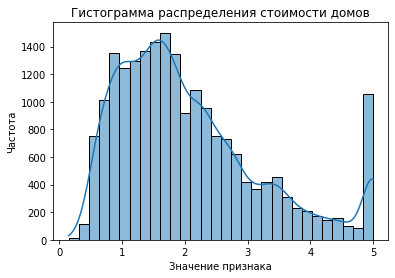

In [4]:
# загружаем данные
dataset = datasets.fetch_california_housing()
data = dataset.target

# задаём параметры гистограммы
ax = sns.histplot(data, bins=30, kde=True)
ax.set(xlabel='Значение признака', ylabel='Частота')
plt.title('Гистограмма распределения стоимости домов')

# отображаем гистограмму
plt.show()

Форма гистограммы несимметрична, с двумя пиками. Отсюда делаем промежуточный вывод: распределение стоимости домов не является нормальным.


## КВАНТИЛЬ-КВАНТИЛЬ ГРАФИК

Квантиль-квантиль график (Q-Q Plot) визуализирует, насколько распределение выборки близко к нормальному. График показывает взаимное расположение квантилей наблюдаемого и теоретического нормального распределения. 

[Хороший гайд по Q-Q Plots.](https://habr.com/ru/articles/578754/)

Если все точки лежат вдоль диагонали, то мы считаем, что данные в выборке распределены нормально:


В Python квантиль-квантиль график можно построить с помощью функции qqplot() пакета statsmodels. 
Построение квантиль-квантиль графика мы также рассмотрим на примере стоимости домов из датасета California Housing:

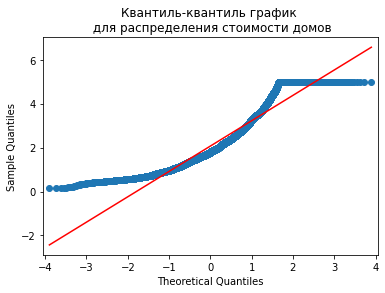

In [5]:
# загружаем данные
dataset = datasets.fetch_california_housing()
data = dataset.target

# задаём параметры квантиль-квантиль графика
sm.qqplot(data, line='s')
plt.title('Квантиль-квантиль график \n для распределения стоимости домов')

# отображаем квантиль-квантиль график
plt.show()

Точки не располагаются на диагонали — распределение стоимости домов не является нормальным (как мы видели и по гистограмме).

Графические методы могут быть неудобны в граничных случаях, когда сложно визуально определить, нормально ли распределение. 
Например, распределение может быть симметричным и похожим на колокол, но не соответствовать другим признакам нормального распределения. 
Также гистограмма и Q-Q Plot неинформативны на маленьких выборках.

В таких случаях на помощь приходят специальные статистические тесты.

## СТАТИСТИЧЕСКИЕ МЕТОДЫ ПРОВЕРКИ НА НОРМАЛЬНОСТЬ

Существует несколько статистических методов, которые позволяют получить количественную оценку для проверки на нормальность. 
Мы рассмотрим наиболее часто встречающийся метод — __тест Шапиро — Уилка__.

Тест Шапиро — Уилка оценивает выборку данных и определяет, насколько вероятно, что данные были получены из нормального распределения.

Тест хорошо работает на выборках до __5000__ объектов.

Гипотезы в основе теста:

- Нулевая: данные распределены нормально.
- Альтернативная: данные не распределены нормально.

[Детали расчёта p-value в тесте Шапиро — Уилка.](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A8%D0%B0%D0%BF%D0%B8%D1%80%D0%BE-%D0%A3%D0%B8%D0%BB%D0%BA%D0%B0)

Если p-value теста больше уровня значимости a, то мы считаем, что данные распределены нормально.

ПРИМЕР ИСПОЛЬЗОВАНИЯ ТЕСТА НА PYTHON

В Python __тест Шапиро — Уилка__ реализован в функции shapiro() пакета scipy.

Эта функция принимает на вход выборочные данные, а выдаёт p-значение и дополнительный параметр — статистику теста.

Примечание. Статистика теста не будет нас интересовать, так как её интерпретация, в отличие от p-value, зависит от конкретного типа теста. 
Поэтому для проведения статистических тестов здесь и далее мы будем ориентироваться только на значение p-value.

Допустим, нам необходимо проверить, нормально ли распределение количества заказов в день в некотором интернет-магазине. 
Чтобы правильно выбрать тест, количество заказов нужно проверить на нормальность:

In [6]:
# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [31, 38, 30, 58, 40, 36, 38, 44, 43, 39, 36, 41, 37, 20, 38, 35, 38, 11, 42, 34]

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data)

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

# p-value = 0.015
# Распределение не нормальное

p-value = 0.015
Распределение не нормальное


Мы рассмотрели графические и статистические методы проверки на нормальность. 
Их можно использовать как вместе, так и по отдельности.

Тест Шапиро — Уилка — не единственный метод проверки на нормальность. 
Существуют и другие, например, тест Д’Агостино или тест Колмогорова — Смирнова. 
У всех этих методов разные принципы работы, но очень похожие результаты, поэтому в большинстве случаев можно использовать любой из них. 
[Ещё больше способов проверки на нормальность.](https://questu.ru/articles/197465/)

### Задание 6.2

Было измерено время, которое необходимо, чтобы оформить заказ в онлайн-магазине. В результате получены следующие значения:

12,  8,  9, 10, 11, 12,  7, 12,  2, 10,  3,  9, 18, 4, 11, 13, 13, 17, 14,  3, 10,  2,  2,  7, 14,  8, 20,  5,  7, 10
С помощью теста Шапиро — Уилка определите, распределены ли значения нормально. 
Введите полученное p-значение, округлённое до двух знаков после точки-разделителя.

In [7]:
# загружаем данные
data = [12,  8,  9, 10, 11, 12,  7, 12,  2, 10,  3,  9, 18, 4, 11, 13, 13, 17, 14,  3, 10,  2,  2,  7, 14,  8, 20,  5,  7, 10]

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data)

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value = 0.414
Распределение нормальное


# Параметрические тесты

Детали расчётов можно посмотреть в следующих источниках:

[С. Гланц. Медико-биологическая статистика.](chrome-extension://oemmndcbldboiebfnladdacbdfmadadm/https://lms-cdn.skillfactory.ru/assets/courseware/v1/847415e20d047d021d9d7df064cb940f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/glantz_mbs.pdf)

[М. Б. Лагутин. Наглядная математическая статистика.](chrome-extension://oemmndcbldboiebfnladdacbdfmadadm/https://lms-cdn.skillfactory.ru/assets/courseware/v1/d8530f267817a83a8d11c84e90c606fe/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/lagutin_naglyadnaya_matematicheskaya_statistika.pdf)


Все функции, которые реализуют параметрические тесты в библиотеках Python:

на вход принимают:
- выборки или их параметры;
- параметры проверяемой гипотезы;

на выход отдают:
- уровень значимости p (p-value);
- дополнительные параметры (в большинстве случаев они нам не нужны).

Предполагается, что в примерах из этого юнита все данные распределены нормально. 
Мы не будем проверять нормальность распределения до проведения теста в целях экономии времени и количества кода. 
Однако в реальных задачах, чтобы сделать выбор теста, требуется сделать проверку на нормальность.

## ОДНОВЫБОРОЧНЫЙ T-КРИТЕРИЙ

Одновыборочный t-критерий (t-test) используют, чтобы сравнить среднее значение признака с его заданным значением.

Одновыборочный t-критерий реализован в функции ttest_1samp() в модуле stats библиотеки scipy.

Основные входные параметры:

- a — выборочные данные;
- popmean — ожидаемое среднее значение признака;
- alternative — вид альтернативной гипотезы:
    - ‘two-sided’ (двусторонняя, используется по умолчанию);
    - ‘less’ (левосторонняя);
    - ‘greater’ (правосторонняя).

Примеры задач, когда может понадобиться использование теста:

- Необходимо проверить, что среднее время, которое пользователи проводят на сайте, больше 5 минут.
- Необходимо установить, соответствуют ли химические показатели товара заявленным на упаковке.

## БИЗНЕС-ЗАДАЧА

Компания закупает батареи для своих устройств у определённого производителя. 
Раньше батареи работали 40 часов. 
Производитель утверждает, что батареи были улучшены и теперь работают дольше.

Компания хочет проверить, правда ли, что батареи работают больше 40 часов. 
Для этого случайным образом выбрали 20 батарей, замерили время их работы и получили следующие данные в часах: 41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34.

Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:
- Нулевая гипотеза: среднее время работы батареи (m) меньше или равно 40 часам. H0: m <= 40
- Альтернативная гипотеза: среднее время работы батареи (m) больше чем 40 часов. H1: m > 40



In [8]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34]

# проводим тест
_, p = stats.ttest_1samp(data, popmean=40, alternative='greater')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.103
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

p-value = 0.103
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


__Вывод:__ у нас нет оснований утверждать, что время работы батарей стало больше, чем 40 часов.

## ДВУХВЫБОРОЧНЫЙ T-КРИТЕРИЙ

Двухвыборочный t-критерий (t-test) используют, чтобы сравнить средние значения в двух независимых группах.

Двухвыборочный t-критерий реализован в функции ttest_ind() в модуле stats библиотеки scipy.

Основные входные параметры:
- a, b — выборочные данные двух групп;
- alternative — вид альтернативной гипотезы:
    - ‘two-sided’ (двусторонняя, используется по умолчанию);
    - ‘less’ (левосторонняя);
    - ‘greater’ (правосторонняя);
- equal_var — равны ли дисперсии в группах (по умолчанию равны).

Ограничения применения теста:
- Группы должны быть независимыми.
- Перед использованием необходимо установить равенство (или неравенство) дисперсий в выборках. 
От этого зависит значение параметра equal_var.

Проверить равенство дисперсии в группах можно с помощью тестов Левена или Бартлетта, которые реализованы в функциях levene() и bartlett() модуля stats библиотеки scipy:
- Нулевая гипотеза обоих тестов утверждает, что дисперсии групп равны.
- На вход функции получают выборочные данные.
- На выход функции отдают p-значение.

Более подробная информация об этих тестах: [тест Бартлетта](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%91%D0%B0%D1%80%D1%82%D0%BB%D0%B5%D1%82%D0%B0), [тест Левена](https://ami.nstu.ru/~headrd/Tests_of_Mean_and_Cov.htm).

- Тест можно применять, только если данные в обеих выборках распределены нормально.

Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. 
Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

Примеры задач, когда может понадобиться использование теста (при соблюдении всех его ограничений):

Перед испытанием нового фитнес-тренажёра проверяют, что рост и вес в двух группах людей одинаков.
Есть две выборки студентов из двух университетов. 
Необходимо узнать, есть ли статистически значимая разница в среднем количестве часов в неделю, которые студенты этих университетов тратят на учёбу.



## БИЗНЕС-ЗАДАЧА

Компания закупает для своих устройств батареи у производителя «Заряд». 
Производитель «Планета» предлагает перейти на их батареи, утверждая, что они работают дольше. 
Компания хочет проверить, правда ли, что батареи «Планета» работают дольше, чем батареи «Заряд».

Для этого случайным образом выбрали по 20 батарей «Заряд» и «Планета», замерили время их работы и получили следующие данные в часах:

Батареи «Заряд»: 41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34.

Батареи «Планета»: 40, 39, 42, 46, 41, 46, 42, 45, 44, 42, 38, 42, 38, 46, 39, 46, 40, 41, 43, 36.

Уровень значимости необходимо взять равным 0.05.

## РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:
- Нулевая гипотеза: среднее время работы батарей «Планета» (m1) меньше или равно среднему времени работы батарей «Заряд» (m2). H0: m1 <= m2
- Альтернативная гипотеза: среднее время работы батарей «Планета» (m1) больше среднего времени работы батарей «Заряд» (m2). H1: m1 > m2



In [23]:
# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41,38,40,46,40,46,41,44,43,39,36,41,37,45,38,45,38,48,42,34])
data_planeta = np.array([40,39,42,46,41,46,42,45,44,42,38,42,38,46,39,46,40,41,43,36])

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data_planeta, data_zaryad)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(data_planeta, data_zaryad, alternative='greater', equal_var= (p > alpha))

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# Тест на равенство дисперсий
# p-value = 0.340
# Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

# Тест на равенство средних
# p-value = 0.260
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

Тест на равенство дисперсий
p-value = 0.340
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.260
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


__Вывод:__ у нас нет оснований утверждать, что батареи «Планета» работают дольше, чем батареи «Заряд».

Обратите внимание, что порядок выборок в параметрах stats.ttest_ind важен: он должен соответствовать альтернативной гипотезе.

Если бы в нашем примере мы перевернули альтернативную гипотезу,

Альтернативная гипотеза: среднее время работы батарей «Заряд» (m2) меньше среднего времени работы батарей «Планета» (m1): H1: m2 < m1

то параметры теста были бы такими (изменён порядок выборок и указано, что альтернативная гипотеза — 'less'):

_, p = stats.ttest_ind(data_zaryad, data_planeta, alternative='less', equal_var=True)
При этом значение p-value не изменяется. Вывод получается таким же.



## ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA)

Однофакторный дисперсионный анализ (ANOVA) используют, чтобы сравнить средние значения в более чем двух независимых группах.

Тест ANOVA реализован в функции f_oneway() в модуле stats библиотеки scipy.

Основные входные параметры:
- sample1, sample2, … — выборочные данные групп.

Ограничения применения теста:
- Группы должны быть независимыми.
- Тест можно выполнять на группах с равной дисперсией.

Проверку равенства дисперсий также можно выполнить с помощью тестов Левена или Бартлетта. Если дисперсии не равны, необходимо обратиться к непараметрическим тестам.

- Тест можно применять, только если данные в обеих выборках распределены нормально.

Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

Примеры задач, когда может понадобиться использование теста (при соблюдении всех его ограничений):
- Проводится эксперимент, в котором изучают влияние различных видов удобрений на урожайность растений.
 В эксперименте участвуют несколько выборок растений, к которым применяют разные виды удобрений (более двух).
- Проводится исследование, в котором изучают влияние различных диет на уровень холестерина у людей. В исследовании участвуют три группы людей, каждая из которых придерживается определённой диеты.

## БИЗНЕС-ЗАДАЧА

Компания закупает для своих устройств батареи у производителя «Заряд». 
Производители «Планета» и «Энергия» предлагают перейти на их батареи, утверждая, что они работают дольше. 
Компания хочет проверить, правда ли, что между батареями трёх производителей есть разница во времени работы.

Уровень значимости необходимо взять равным 0.05.

Случайным образом выбрали по 20 батарей «Заряд», «Планета» и «Энергия», замерили время их работы и получили следующие данные в часах:

- Батареи «Заряд  »   : 31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34.
- Батареи «Планета» : 36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43.
- Батареи «Энергия» : 35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43.

## РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:
- Нулевая гипотеза: среднее время работы батарей «Заряд» (m1), «Планета» (m2) и «Энергия» (m3) одинаковое. H0: m1 = m2 = m3
- Альтернативная гипотеза: среднее время работы батарей «Заряд» (), «Планета» () и «Энергия» () не одинаковое. H1: m1 <> m2 <> m3



In [24]:
# задаём уровень значимости
alpha = 0.05

# загружаем данные
group_zaryad = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
group_planeta = [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43]
group_energiya = [35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43]

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(group_zaryad, group_planeta, group_energiya)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.f_oneway(group_zaryad, group_planeta, group_energiya)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# Тест на равенство дисперсий
# p-value = 0.303
# Дисперсии одинаковы, мы можем использовать тест ANOVA

# Тест на равенство средних
# p-value = 0.141
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

Тест на равенство дисперсий
p-value = 0.303
Дисперсии одинаковы, мы можем использовать тест ANOVA

Тест на равенство средних
p-value = 0.141
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


__Вывод:__ у нас нет оснований утверждать, что у батарей трёх производителей есть разница во времени работы.

## ПАРНЫЙ T-КРИТЕРИЙ

Парный t-критерий (t-test) используют, чтобы сравнить средние значения в двух зависимых группах.

Парный t-критерий реализован в функции ttest_rel() в модуле stats библиотеки scipy.

Основные входные параметры:
- a, b — выборочные данные двух зависимых групп;
- alternative — вид альтернативной гипотезы:
    - ‘two-sided’ (двусторонняя, используется по умолчанию);
    - ‘less’ (левосторонняя);
    - ‘greater’ (правосторонняя).

Ограничения применения теста:
- Тест можно применять, только если данные в обеих выборках распределены нормально.

Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

Примеры задач, когда может понадобиться использование теста:
- Требуется оценить эффективность нового лекарства, сравнивая показатели здоровья (пульса / давления / уровня сахара в крови) одних и тех же пациентов до и после его применения.
- Требуется оценить эффективность рекламной кампании, сравнивая показатели продаж до и после её запуска.

## БИЗНЕС-ЗАДАЧА

Компания закупает для своих устройств батареи у производителя «Заряд». 
Производитель «Планета» предлагает перейти на их батареи, утверждая, что они работают дольше. 
Компания хочет проверить, правда ли, что батареи «Планета» работают дольше, чем батареи «Заряд».

Уровень значимости необходимо взять равным 0.05.

При планировании эксперимента присутствовал эксперт, который сказал, что время работы батареи зависит от устройства, на котором проходит замер, то есть результаты эксперимента оказались зависимыми.

Случайным образом выбрали по 20 батарей «Заряд» и «Планета». 
На каждом из устройств сначала замерили время работы батареи одного производителя, затем — второго и получили следующие данные в часах:

- Батареи «Заряд»: 1, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46.
- Батареи «Планета»: 45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42.

## РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:
- Нулевая гипотеза: среднее время работы батарей «Планета» (m1) меньше или равно среднему времени работы батарей «Заряд» (m2). H0: m1 <= m2
- Альтернативная гипотеза: среднее время работы батарей «Планета» (m1) больше среднего времени работы батарей «Заряд» (m2). H1: m1 > m2


In [11]:
# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46])
data_planeta = np.array([45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42])

# проводим тест
_, p = stats.ttest_rel(data_planeta, data_zaryad, alternative='greater')
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.023
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


__Вывод__: батареи «Планета» работают дальше, чем батареи «Заряд».

## ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA) С ПОВТОРНЫМИ ИЗМЕРЕНИЯМИ

Однофакторный дисперсионный анализ (ANOVA) с повторными измерениями используют, чтобы сравнить средние значения в более чем двух зависимых группах.

Тест ANOVA с повторными измерениями реализован в функции AnovaRM() в модуле stats библиотеки statsmodels.

Основные входные параметры:
- data — датафрейм с выборочными данными (три колонками: id группы, id объекта, значение признака);
- within — название колонки с id группы;
- subject — название колонки с id объекта;
- depvar — название колонки со значением признака.

Ограничения применения теста:
- Тест можно применять, только если данные в обеих выборках распределены нормально.

Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

Примеры задач, когда может понадобиться использование теста:
- Требуется оценить эффективность нового лекарства, сравнивания показатели здоровья одних и тех же пациентов до его приёма и через каждую неделю после начала приёма (количество периодов — более двух).
- Требуется изучать влияние нового рекламного материала на покупательское поведение клиентов ежедневно на протяжении недели.

## БИЗНЕС-ЗАДАЧА

Компания закупает для своих устройств батареи у производителя «Заряд».
Производители «Планета» и «Энергия» предлагают перейти на их батареи, утверждая, что они работают дольше. 
Компания хочет проверить, правда ли, что между батареями трёх производителей есть разница во времени работы.

Уровень значимости необходимо взять равным 0.05.

При планировании эксперимента присутствовал эксперт, который сказал, что время работы батареи зависит от устройства, на котором проходит замер.

Случайным образом выбрали по пять батарей «Заряд», «Планета» и «Энергия». 
На каждом из устройств замерили время работы батареи одного производителя, затем — второго, затем — третьего и получили следующие данные в часах:

- Батареи «Заряд»: 36, 45, 41, 41, 35.
- Батареи «Планета»: 32, 34, 42, 48, 43.
- Батареи «Энергия»: 41, 39, 35, 34, 52.

## РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:
- Нулевая гипотеза: среднее время работы батарей «Заряд» (m1), «Планета» (m2) и «Энергия» (m3) одинаковое. H0: m1=m2=m3
- Альтернативная гипотеза: среднее время работы батарей «Заряд» (), «Планета» () и «Энергия» () не одинаковое. H1: m1 <> m2 <> m3



In [12]:
from statsmodels.stats.anova import AnovaRM

# задаём уровень значимости
alpha = 0.05 

# создаём датасет
data = pd.DataFrame({'group': np.repeat(['Заряд', 'Планета', 'Энергия'], 5),
                          'object_id': np.tile([1, 2, 3, 4, 5], 3),                          
                          'value': [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52]})


# проводим тест
print(AnovaRM(data=data, depvar='value', subject='object_id', within=['group']).fit())

#              Anova
# ==================================
#       F Value Num DF Den DF Pr > F
# ----------------------------------
# group  0.0100 2.0000 8.0000 0.9900
# ==================================

              Anova
      F Value Num DF Den DF Pr > F
----------------------------------
group  0.0100 2.0000 8.0000 0.9900



Обратите внимание, что для использования теста необходимо вызвать метод fit(). 
Формат информации, который возвращает функция AnovaRM(), сильно отличается от ранее рассмотренных тестов: p-value отображается в колонке Pr > F.

В нашем примере p-значение равно 0.99. P-значение больше, чем заданный уровень значимости 0.05. 
Таким образом, у нас нет оснований отвергнуть нулевую гипотезу.

__Вывод__: у нас нет оснований утверждать, что у батарей трёх производителей есть разница во времени работы.

## Задание 7.3

Компания оптимизировала доставку товаров и хочет узнать, сократилось ли среднее время доставки до 40 минут. Измерили время 20 случайных доставок — оно приведено в минутах и содержится в списке data:

data = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]

Данные распределены нормально.

## Решение:

Сформулируем гипотезы в математическом виде:
- Нулевая гипотеза: среднее время доставки (m) больше или равно 40 минут. H0: m >= 40
- Альтернативная гипотеза: среднее время доставки (m) меньше чем 40 минут. H1: m < 40

Одновыборочный t-критерий (t-test)

In [13]:

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]

# проводим тест
_, p = stats.ttest_1samp(data, popmean=40, alternative='less')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 0.018
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


## Задание 7.4

Компания хочет узнать, отличается ли время доставки в трёх районах города: Северном, Южном, Восточном. 
Измерили время 25 случайных доставок в каждом из районов — оно составило в минутах:

- Северный: data_north = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
- Южный: data_south = [32, 60, 59, 39, 107, 88, 66, 81, 68, 49, 138, 11, 81, 77, 45, 11, 54, 56, 71, 63, 105, 32, 53, 17, 27]
- Восточный: data_east = [80, 92, 60, 33, 86, 80, 57, 71, 100, 128, 6, 31, 95, 91, 66, 45, 79, 27, 100, 3, 65, 105, 20, 80, 81]

Данные распределены нормально.

Сформулируем гипотезы в математическом виде:
- Нулевая гипотеза: среднее время доставки Северный (m1), Южный (m2) и Восточный (m3) одинаковое. H0: m1 = m2 = m3
- Альтернативная гипотеза: среднее время доставки Северный (m1), Южный (m2) и Восточный (m3) не одинаковое. H1: m1 <> m2 <> m3

Однофакторный дисперсионный анализ (ANOVA) 

20
[31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]


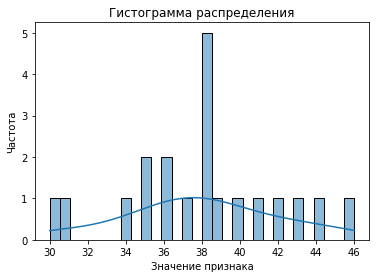

p-value = 0.904
Распределение нормальное
Тест на равенство дисперсий
p-value = 0.012
Дисперсии не одинаковы, нужно использовать непараметрический тест

Тест на равенство средних
p-value = 0.015
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [29]:
# задание на исправлении в школе
# задаём уровень значимости
alpha = 0.05

# загружаем данные
data_north = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
data_south  = [32, 60, 59, 39, 107, 88, 66, 81, 68, 49, 138, 11, 81, 77, 45, 11, 54, 56, 71, 63, 105, 32, 53, 17, 27]
data_east = [380, 92, 60, 33, 86, 80, 57, 71, 100, 128, 6, 31, 95, 91, 66, 45, 79, 27, 100, 3, 65, 105, 20, 80, 81]

# дополним список медианой
#data_north.extend([int(statistics.median(data_north))]*(len(data_east)-len(data_north))) 
print(len(data_north))
print(data_north)

# посмотрим на гистограмму
data = data_north

# задаём параметры гистограммы
ax = sns.histplot(data, bins=30, kde=True)
ax.set(xlabel='Значение признака', ylabel='Частота')
plt.title('Гистограмма распределения')

# отображаем гистограмму
plt.show()

# проверить нормальность
# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data)

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')


# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data_north, data_south, data_east)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

# проводим тест на сравнение средних в группах 
print('\nТест на равенство средних')
_, p = stats.f_oneway(data_north, data_south, data_east)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


## Задание 7.5

Компания провела обучение курьеров и хочет узнать, привело ли это к уменьшению времени доставки. 
Для 30 курьеров было измерено время доставки до и после обучения и получены следующие данные в минутах:

до:

data_before = [21, 19, 25, 18, 32, 10, 26, 25, 35, 26, 23, 37, 30, 40, 29, 35, 28, 39, 26, 32, 40, 29, 44, 34, 37, 12, 37, 23, 33, 42]

после:

data_after = [23, 17, 41, 25, 9, 22, 18, 42, 27, 29, 30, 23, 38, 14, 27, 29, 28, 18, 19, 26, 29, 25, 32, 26, 47, 50, 30, 30, 36, 16]

## РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:
- Нулевая гипотеза: среднее время доставки до (m1) меньше или равно среднему времени доставки после (m2). H0: m1 <= m2
- Альтернативная гипотеза: среднее время доставки до (m1) больше среднего времени доставки после (m2). H1: m1 > m2

Парный t-критерий 

In [15]:
# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_before = np.array([21, 19, 25, 18, 32, 10, 26, 25, 35, 26, 23, 37, 30, 40, 29, 35, 28, 39, 26, 32, 40, 29, 44, 34, 37, 12, 37, 23, 33, 42])
data_after = np.array([23, 17, 41, 25, 9, 22, 18, 42, 27, 29, 30, 23, 38, 14, 27, 29, 28, 18, 19, 26, 29, 25, 32, 26, 47, 50, 30, 30, 36, 16])

# проводим тест
_, p = stats.ttest_rel(data_before, data_after, alternative='greater')
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 0.213
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


# Непараметрические тесты

акие тесты используются, когда данные не распределены нормально или об их распределении ничего не известно.

Особенность непараметрических методов в том, что они сравнивают не сами значения признаков, а их ранги или частоты.

В параметрических методах нулевые гипотезы содержали утверждения о равенстве средних значений признаков в группах. В непараметрических тестах нулевые гипотезы будут о равенстве распределений признаков (что включает в себя равенство средних) или о равенстве медиан признаков (в нормальных распределениях медианы и средние равны).

Все функции, которые реализуют непараметрические тесты в Python-библиотеках:
- берут на вход:
    - выборки или их параметры;
    - параметры проверяемой гипотезы;
- отдают на выход:
    - уровень значимости p (p-value);
    - дополнительные параметры.
    
В примерах этого юнита мы не проверяем данные на нормальность. 
Однако чтобы выбрать тест в реальных задачах, необходимо сделать такую проверку. 
Если данные распределены нормально, лучше выбрать параметрические тесты.

## КРИТЕРИЙ ЗНАКОВ (ДЛЯ ОДНОЙ ГРУППЫ)

Критерий знаков (для одной группы) используют, чтобы сравнить значения медианы признака с заданным значением. 
Это непараметрический аналог одновыборочного t-критерия.

Критерий знаков (для одной группы) реализован в функции sign_test модуля stats библиотеки statsmodels.

Основные входные параметры:
- samp — выборочные данные;
- mu0 — ожидаемое значение медианы признака.

Пример задачи, когда может понадобиться использование теста:
- Требуется проверить, соответствует ли время ответа оператора времени, заявленному в программе лояльности (время ответа, как правило, не подчиняется нормальному закону).

## БИЗНЕС-ЗАДАЧА

Чтобы отвечать на наиболее часто встречающиеся вопросы о заказах, онлайн-магазин добавил на сайт чат-бота. Планировалось, что это приведёт к изменению времени, за которое покупатель получает ответ на вопрос (раньше оно составляло 60 секунд). Бизнес-заказчик просит узнать, действительно ли время получения ответа больше не составляет 60 секунд.

Чтобы это проверить, замерили время ответа чат-бота для 30 случайно выбранных вопросов. В результате получили следующие данные (в секундах):

55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59

Уровень значимости необходимо взять равным 0.05.

## РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:
- Нулевая гипотеза: значение медианы получения ответа с помощью чат-бота (m) равно 60 секунд. H0: m=60
- Альтернативная гипотеза: значение медианы получения ответа с помощью чат-бота (m) не равно 60 секунд. H1: m <> 0



In [16]:
from statsmodels.stats.descriptivestats import sign_test

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]

# проводим тест
_, p = sign_test(data, 60)

print('p-value = {:.9f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.000
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.000000007
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


__Вывод__: время получения ответа изменилось и больше не составляет 60 секунд.

## U-КРИТЕРИЙ МАННА — УИТНИ

U-критерий Манна — Уитни используют, чтобы оценить различия распределений признака в двух независимых группах. 
Это непараметрический аналог двухвыборочного t-критерия.

U-критерий Манна — Уитни реализован в функции mannwhitneyu модуля stats библиотеки scipy.

Основные входные параметры:
- x, y — выборочные данные двух групп;
- alternative — вид альтернативной гипотезы:
    - ‘two-sided’ (двусторонняя, используется по умолчанию);
    - ‘less’ (левосторонняя);
    - ‘greater’ (правосторонняя).
Метод основан на следующей процедуре:
- Две выборки объединяют и упорядочивают в порядке возрастания признака.
- Определяют, равномерно ли распределены объекты каждой группы в упорядоченном списке.
- Если объекты одной из групп сконцентрированы в одной из частей списка, то распределения признаков неодинаковы.

Примеры задач, когда может понадобиться использование теста:
- Требуется сравнить распределение зарплат выпускников университета А с зарплатой пяти выпускников университета Б (распределение зарплаты, как правило, не является нормальным).
- Необходимо узнать, различаются ли распределения потери веса для двух групп: для людей, использующих диету А, и для людей, использующих диету Б (потеря веса, как правило, не распределяется нормально).

# БИЗНЕС-ЗАДАЧА

Чтобы отвечать на наиболее часто встречающиеся вопросы о заказах, онлайн-магазин добавил на сайт чат-бота. 
До этого покупатели могли получить ответ на вопрос через звонок оператору. 
Бизнес-заказчик просит проверить, изменилось ли время получения ответа после внедрения чат-бота.

Чтобы это выяснить, замерили время ответа с помощью чат-бота для 30 случайно выбранных вопросов, 
а также время ответа через звонок оператору для ещё 30 случайно выбранных вопросов . 
В результате получили следующие данные (в секундах):
- Чат-бот: 55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59.
- Звонок оператору: 72, 80, 66, 72, 75, 71, 73, 71, 75, 68, 63, 68, 62, 65, 77, 66, 67, 62, 60, 74, 61, 67, 61, 63, 62, 79, 61, 63, 62, 63.

Уровень значимости необходимо взять равным 0.05.

# РЕШЕНИЕ

Сформулируем гипотезы:
- Нулевая гипотеза: распределения времени получения ответа через чат-бота и через звонок оператору одинаковы. H0: m1 = m2
- Альтернативная гипотеза: распределения времени получения ответа через чат-бота и через звонок оператору неодинаковы. H1: m1 <> m2

In [17]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_chat_bot = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]
data_operator = [72, 80, 66, 72, 75, 71, 73, 71, 75, 68, 63, 68, 62, 65, 77, 66, 67, 62, 60, 74, 61, 67, 61, 63, 62, 79, 61, 63, 62, 63]

# проводим тест
_, p = stats.mannwhitneyu(data_chat_bot, data_operator)

print('p-value = {:.22f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.3f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.3f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.000
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.0000000000311036143269
p-значение меньше, чем заданный уровень значимости 0.050. Отвергаем нулевую гипотезу.


__Вывод__: время получения ответа изменилось после внедрения чат-бота.

# КРИТЕРИЙ УИЛКОКСОНА

Критерий Уилкоксона используют, чтобы оценить различия распределений признака в двух зависимых группах. 
Это непараметрический аналог парного t-критерия.

Критерий Уилкоксона реализован в функции wilcoxon модуля stats библиотеки scipy.

Основные входные параметры:
- x, y — выборочные данные двух групп;
- alternative — вид альтернативной гипотезы:
    - ‘two-sided’ (двусторонняя, используется по умолчанию);
    - ‘less’ (левосторонняя);
    - ‘greater’ (правосторонняя).

Этот тест аналогичен критерию знаков (для одной группы).

Примеры задач, когда может понадобиться использование теста:
- Необходимо сравнить два метода обучения, сравнив успеваемость студентов до и после использования каждого из методов (успеваемость не распределена нормально).
- Требуется оценить различия в затратах на производство продукта до и после обновления технологий (затраты не подчиняются нормальному закону).

## БИЗНЕС-ЗАДАЧА

Чтобы отвечать на наиболее часто встречающиеся вопросы о заказах, онлайн-магазин добавил на сайт чат-бота.
До этого покупатели могли получить ответ на вопрос через звонок оператору. 
Планировалось, что нововведение приведёт к уменьшению времени получения ответа. 
Бизнес-заказчик просит узнать, действительно ли получить ответ с помощью чат-бота быстрее, чем через звонок оператору. 
Эксперты в предметной области говорят, что время ответа сильно зависит от вопроса покупателя, поэтому замер необходимо делать на одних и тех же вопросах.

Чтобы решить задачу, для 30 случайно выбранных вопросов сначала замерили время ответа с помощью чат-бота, а затем — время ответа через звонок оператору. 
В результате получили следующие данные (в секундах):
- Чат-бот: 71, 97, 71, 97, 83, 90, 83, 94, 88, 76, 79, 99, 82, 85, 93, 78, 76, 87, 73, 72, 89, 89, 71, 86, 78, 93, 86, 95, 83, 73.
- Звонок оператору: 114, 112, 115, 124, 101, 108, 104, 109, 103, 115, 100, 129, 120, 129, 117, 125, 112, 105, 128, 107, 120, 108, 129, 100, 116, 105, 128, 128, 120, 106.

Уровень значимости необходимо взять равным 0.05.

## РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:
- Нулевая гипотеза: распределения времени получения ответа через чат-бота и через звонок оператору одинаковы. H0: m1 >= m2
- Альтернативная гипотеза: распределения времени получения ответа через чат-бота и через звонок оператору неодинаковы. H1: m1 < m2

In [18]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_chat_bot = [71, 97, 71, 97, 83, 90, 83, 94, 88, 76, 79, 99, 82, 85, 93, 78, 76, 87, 73, 72, 89, 89, 71, 86, 78, 93, 86, 95, 83, 73]
data_operator = [114, 112, 115, 124, 101, 108, 104, 109, 103, 115, 100, 129, 120, 129, 117, 125, 112, 105, 128, 107, 120, 108, 129, 100, 116, 105, 128, 128, 120, 106]

# проводим тест
_, p = stats.wilcoxon(data_chat_bot, data_operator, alternative = 'less')

print('p-value = {:.9f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.000
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.000000001
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


__Вывод__: время получения ответа через чат-бота меньше, чем через звонок оператору.

## КРИТЕРИЙ КРАСКЕЛА — УОЛЛИСА

Критерий Краскела — Уоллиса (однофакторный дисперсионный анализ на рангах) является обобщением U-критерия Манна — Уитни на случай нескольких групп. 
Его используют, чтобы оценить различия медиан признака в двух и более независимых группах. Это непараметрический аналог ANOVA.

Критерий Краскела — Уоллиса реализован в функции kruskal модуля stats библиотеки scipy.

Основные входные параметры:
- sample1, sample2, … — выборочные данные групп.

Примеры задач, когда может понадобиться использование теста:
- Необходимо сравнить распределения стоимости заказов в нескольких городах. Чтобы избежать влияния выбросов, вместо сравнения средних значений используют ранги.
- Требуется сравнить распределения стоимости жилья в разных районах города. Чтобы учесть различия в распределении стоимости, вместо сравнения средних значений используют ранги.

## БИЗНЕС-ЗАДАЧА

У онлайн-магазина существует три группы лояльности для покупателей: базовый, серебряный и золотой. 
Вопросы покупателей, на которые не может ответить чат-бот, направляются оператору. 
Чтобы вопросы от покупателей более высокого уровня лояльности обрабатывались быстрее, разработали систему ранжирования вопросов. 
Бизнес-заказчик просит проверить, действительно ли есть разница во времени обработки вопроса для покупателей разных уровней лояльности.

Чтобы это выяснить, случайным образом выбрали по 30 вопросов для каждого уровня и замерили для них время ответа с помощью чат-бота. 

В результате получили следующие данные (в секундах):
- Базовый: 106, 96, 105, 119, 91, 118, 108, 98, 103, 102, 98, 97, 104, 100, 94, 94, 98, 103, 95, 93, 118, 91, 96, 115, 119, 111, 102, 118, 91, 98.
- Серебряный: 96, 95, 102, 103, 96, 120, 97, 112, 108, 90, 99, 93, 91, 91, 119, 95, 110, 108, 117, 99, 100, 99, 119, 98, 101, 95, 118, 110, 114, 116.
- Золотой: 99, 106, 92, 97, 98, 95, 119, 120, 116, 93, 102, 109, 98, 99, 100, 113, 91, 96, 119, 96, 95, 112, 111, 110, 102, 112, 105, 93, 111, 111.

Уровень значимости необходимо взять равным 0.05.

## РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:
- Нулевая гипотеза: медианы времени обработки вопросов от покупателей уровней базовый (m1), серебряный (m2) и золотой (m3) равны.
- Альтернативная гипотеза: медианы времени обработки вопросов от покупателей уровней базовый (m1), серебряный (m2) и золотой (m3) не равны.


In [19]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_basic = [106, 96, 105, 119, 91, 118, 108, 98, 103, 102, 98, 97, 104, 100, 94, 94, 98, 103, 95, 93, 118, 91, 96, 115, 119, 111, 102, 118, 91, 98 ]
data_silver = [96, 95, 102, 103, 96, 120, 97, 112, 108, 90, 99, 93, 91, 91, 119, 95, 110, 108, 117, 99, 100, 99, 119, 98, 101, 95, 118, 110, 114, 116]
data_gold = [99, 106, 92, 97, 98, 95, 119, 120, 116, 93, 102, 109, 98, 99, 100, 113, 91, 96, 119, 96, 95, 112, 111, 110, 102, 112, 105, 93, 111, 111]

# проводим тест
_, p = stats.kruskal(data_basic, data_silver, data_gold)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.837
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

p-value = 0.837
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


__Вывод__: у нас нет оснований утверждать, что есть разница во времени обработки вопросов от покупателей разных уровней лояльности.

## КРИТЕРИЙ ФРИДМАНА

Критерий Фридмана используют, чтобы оценить различия распределений признака в двух и более зависимых группах. 
Это непараметрический аналог парного ANOVA с повторными измерениями.

Критерий Фридмана реализован в функции friedmanchisquare модуля stats библиотеки scipy.

Основные входные параметры:
- sample1, sample2, … — выборочные данные групп.

## БИЗНЕС-ЗАДАЧА

У онлайн-магазина существует три уровня программы лояльности: «Базовый», «Серебряный» и «Золотой». 
Вопросы покупателей, на которые не может ответить чат-бот, направляются оператору. 
Чтобы вопросы от покупателей более высокого уровня лояльности обрабатывались быстрее, разработали систему ранжирования вопросов. 
Бизнес-заказчик просит проверить, действительно ли есть разница во времени обработки вопроса для покупателей разных уровней лояльности. 
Эксперты в предметной области говорят, что время ответа сильно зависит от вопроса покупателя, поэтому замер стоит делать на одних и тех же вопросах.

Чтобы решить задачу, случайным образом выбрали 30 вопросов и замерили на них время ответа с помощью чат-бота для трёх уровней лояльности. В результате получили следующие данные (в секундах):

- «Базовый»: 113, 115, 108, 104, 107, 96, 114, 103, 103, 120, 92, 103, 120, 100, 110, 106, 112, 99, 118, 113, 102, 94, 92, 109, 91, 113, 95, 107, 110, 103.
- «Серебряный»: 89, 80, 95, 77, 82, 98, 84, 83, 73, 93, 89, 78, 90, 73, 83, 73, 84, 90, 75, 75, 86, 88, 72, 72, 96, 75, 87, 99, 80, 82.
- «Золотой»: 62, 84, 67, 71, 64, 89, 65, 70, 86, 77, 84, 81, 89, 68, 87, 70, 70, 61, 82, 79, 60, 62, 88, 61, 76, 87, 79, 90, 77, 65.

Уровень значимости необходимо взять равным 0.05.

## РЕШЕНИЕ

Сформулируем гипотезы:
- Нулевая гипотеза: распределения времени обработки вопросов от покупателей уровней «Базовый», «Серебряный» и «Золотой» одинаковы.
- Альтернативная гипотеза: распределения времени обработки вопросов от покупателей уровней «Базовый», «Серебряный» и «Золотой» неодинаковы.

In [20]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_basic = [113, 115, 108, 104, 107, 96, 114, 103, 103, 120, 92, 103, 120, 100, 110, 106, 112, 99, 118, 113, 102, 94, 92, 109, 91, 113, 95, 107, 110, 103]
data_silver = [89, 80, 95, 77, 82, 98, 84, 83, 73, 93, 89, 78, 90, 73, 83, 73, 84, 90, 75, 75, 86, 88, 72, 72, 96, 75, 87, 99, 80, 82]
data_gold = [62, 84, 67, 71, 64, 89, 65, 70, 86, 77, 84, 81, 89, 68, 87, 70, 70, 61, 82, 79, 60, 62, 88, 61, 76, 87, 79, 90, 77, 65]

# проводим тест
_, p = stats.friedmanchisquare(data_basic, data_silver, data_gold)

print('p-value = {:.18f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.000
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.000000000364194397
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


__Вывод__: время обработки вопросов для покупателей разных уровней лояльности различно.

## Задание 8.3

Компания обновила интерфейс для обработки заявок и хочет узнать, привело ли это к увеличению количества обработанных заявок. 
Для 30 сотрудников измерили число обработанных заявок до и после обновления интерфейса и получили следующие данные:

До: data_before = [51, 46, 40, 48, 44, 42, 48, 36, 44, 35, 42, 52, 38, 33, 40, 43, 51, 38, 36, 47, 42, 44, 47, 36, 41, 46, 33, 51, 49, 41]

После: data_after = [46, 44, 47, 51, 52, 37, 46, 49, 45, 40, 32, 41, 48, 36, 37, 39, 37, 42, 46, 38, 42, 35, 41, 41, 42, 33, 47, 49, 36, 37]

Данные не распределены по нормальному закону.

## РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:
- Нулевая гипотеза: количество заявок не увеличилось. H0: m1 => m2
- Альтернативная гипотеза: количество заявок увеличилось. H1: m1 < m2

In [32]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_before = [51, 46, 40, 48, 44, 42, 48, 36, 44, 35, 42, 52, 38, 33, 40, 43, 51, 38, 36, 47, 42, 44, 47, 36, 41, 46, 33, 51, 49, 41]
data_after = [46, 44, 47, 51, 52, 37, 46, 49, 45, 40, 32, 41, 48, 36, 37, 39, 37, 42, 46, 38, 42, 35, 41, 41, 42, 33, 47, 49, 36, 37]

# проводим тест
_, p = stats.wilcoxon(data_before, data_after, alternative = 'less')

print('p-value = {:.9f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 0.741935031
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


## Задание 8.4

Компания обновила интерфейс для обработки заявок и хочет узнать, стало ли среднее количество обработанных за день заявок равно 75. 
На протяжении 30 дней замеряли количество обработанных заявок — оно получилось следующим:

data = [77, 78, 74, 81, 87, 73, 80, 72, 73, 81, 88, 74, 74, 79, 78, 73, 89, 82, 77, 77, 88, 75, 80, 88, 72, 84, 88, 74, 74, 78]

Данные не распределены по нормальному закону.

Критерий знаков (для одной группы)

In [22]:
from statsmodels.stats.descriptivestats import sign_test

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [77, 78, 74, 81, 87, 73, 80, 72, 73, 81, 88, 74, 74, 79, 78, 73, 89, 82, 77, 77, 88, 75, 80, 88, 72, 84, 88, 74, 74, 78]

print(statistics.mean(data))

# проводим тест
_, p = sign_test(data, 75)

print('p-value = {:.9f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


78.93333333333334
p-value = 0.136045948
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


## Задание 8.5

Компания хочет узнать, отличается ли количество обработанных за день заявок по категориям «Тарифы», «Спецпредложения», «Техподдержка». 
На протяжении 25 дней измеряли количество обработанных заявок в каждой из категорий — оно составило:

- «Тарифы»:
data_tariffs = [57, 56, 64, 62, 64, 63, 57, 64, 57, 63, 62, 59, 61, 61, 62, 57, 55, 60, 56, 62, 64, 56, 62, 62, 65]
- «Спецпредложения»:
data_offers = [56, 56, 60, 64, 62, 63, 63, 56, 64, 60, 58, 61, 59, 63, 62, 63, 59, 64, 63, 58, 61, 61, 62, 55, 61]
- «Техподдержка»:
data_support = [65, 67, 65, 69, 66, 65, 62, 63, 65, 69, 64, 61, 69, 69, 62, 68, 65, 69, 62, 67, 63, 69, 63, 67, 61]

Критерий Краскела — Уоллиса (однофакторный дисперсионный анализ на рангах) является обобщением U-критерия Манна — Уитни на случай нескольких групп.
Его используют, чтобы оценить различия медиан признака в двух и более независимых группах. Это непараметрический аналог ANOVA.


In [34]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_tariffs = [57, 56, 64, 62, 64, 63, 57, 64, 57, 63, 62, 59, 61, 61, 62, 57, 55, 60, 56, 62, 64, 56, 62, 62, 65]
data_offers = [56, 56, 60, 64, 62, 63, 63, 56, 64, 60, 58, 61, 59, 63, 62, 63, 59, 64, 63, 58, 61, 61, 62, 55, 61]
data_support = [65, 67, 65, 69, 66, 65, 62, 63, 65, 69, 64, 61, 69, 69, 62, 68, 65, 69, 62, 67, 63, 69, 63, 67, 61]

# проводим тест
_, p = stats.kruskal(data_tariffs, data_offers, data_support)

print('p-value = {:.9f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))



p-value = 0.000000704
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


## Статистические тесты для категориальных признаков

Основное отличие категориальных признаков от количественных состоит в том, что над категориальными значениями нельзя выполнять арифметические операции: вычислять среднее, медиану, дисперсию и т. д.

Для категориальных признаков можно только посчитать количество объектов в выборке с каждым из значений категориального признака, то есть посчитать частоты. 
Например, в выборке клиентов сотового оператора есть 50 человек с тарифом «Ультима», 30 человек — с тарифом «Мега» и 60 человек — с тарифом «Абсолют».

Все статистические тесты для категориальных признаков основаны именно на подсчёте и сравнении частот.

__Критерий хи-квадрат__ позволяет оценить, связаны ли между собой два категориальных признака.

Примеры гипотез:
- Есть ли связь между городом и уровнем образования его жителей?
- Есть ли связь между тарифом сотового оператора и сферой работы клиента?

__Критерий Мак-Немара__ позволяет определить, есть ли статистически значимые различия в частоте появления бинарных признаков в двух связанных выборках.

Примеры гипотез:
- Отличается ли доля заболевших гриппом до и после прививки?
- Отличаются ли доли товаров, считающихся бракованными, при проверке на новом и старом оборудовании?

Функции для тестов над категориальными переменными отдают на выход уровень значимости p, по которому мы можем принять решение о верности выдвинутых гипотез.

## КРИТЕРИЙ ХИ-КВАДРАТ

Критерий хи-квадрат () используют, чтобы определить связь между двумя категориальными переменными. 
Это одновыборочный тест: мы анализируем взаимосвязь между двумя признаками объектов одной выборки.

Критерий хи-квадрат реализован в функции chi2_contingency модуля stats библиотеки scipy.

Основные входные параметры:
- observed — таблица сопряжённости для двух категориальных переменных.
- Таблица сопряжённости — это средство представления совместного распределения двух переменных, в котором:
    - строки соответствуют возможным значениям первого признака;
    - столбцы соответствуют возможным значениям второго признака;
    - значения ячеек — это количество объектов в выборке с соответствующими значениями первого и второго признаков.

Условие применимости критерия хи-квадрат — наличие как минимум пяти объектов в каждой ячейке. 
Если это условие не выполняется, необходимо обратиться к [точному критерию Фишера](http://www.machinelearning.ru/wiki/index.php?title=%D0%A2%D0%BE%D1%87%D0%BD%D1%8B%D0%B9_%D1%82%D0%B5%D1%81%D1%82_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

Таблицу сопряжённости можно построить с помощью функции crosstab библиотеки Pandas. 
На вход функции подаются два списка со значениями первого и второго признаков, для которых необходимо построить таблицу сопряжённости.

## БИЗНЕС-ЗАДАЧА

Оператор сотовой связи хочет узнать, есть ли связь между тарифом, который выбрал клиент, и наличием у него детей.
Были собраны необходимые данные по 39 случайным клиентам.
Уровень значимости необходимо взять равным 0.05.

## РЕШЕНИЕ

Сформулируем гипотезы:
- Нулевая гипотеза: признаки «Тариф» и «Наличие детей» независимы.
- Альтернативная гипотеза: признаки «Тариф» и «Наличие детей» взаимосвязаны.

In [39]:
import scipy.stats as stats
import pandas as pd

# задаём уровень значимости
alpha = 0.05 

data = pd.read_csv('data/cat_variables_tarif_children.csv')

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['Тариф'], data['Наличие детей'])

# проводим тест
_, p, _, _ = stats.chi2_contingency(table)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.373
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

p-value = 0.373
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


__Примечание.__ К хи-квадрат тестам также относятся тесты на гомогенность (goodness of fit) и тест для дисперсий. 
Более подробное [описание этих тестов.](https://dtf.ru/gamedev/1270463-semeystvo-testov-hi-kvadrat-chto-u-nih-pod-kapotom-i-kakie-vybrat-dlya-sravneniya-voronok)


## КРИТЕРИЙ МАК-НЕМАРА

Критерий Мак-Немара — это двухвыборочный тест для связанных выборок, который позволяет сравнить бинарные признаки.

Критерий Мак-Немара реализован в функции mcnemar модуля stats библиотеки statsmodels.

Основные входные параметры:
- table — таблица сопряжённости размера 2х2.

## БИЗНЕС-ЗАДАЧА

Оператор сотовой связи хочет увеличить долю клиентов, которые пользуются мобильным приложением. 
Для этого провели соответствующую рекламную кампанию. Необходимо узнать, изменилась ли доля клиентов, пользующихся приложением, после проведения рекламной кампании.

Были собраны данные об использовании приложения по 30 случайным клиентам до и после рекламной кампании.

Уровень значимости необходимо взять равным 0.05.

## РЕШЕНИЕ

Сформулируем гипотезы:
- Нулевая гипотеза: после просмотра рекламы доля клиентов, которые пользуются приложением, не изменилась.
- Альтернативная гипотеза: после просмотра рекламы доля клиентов, которые пользуются приложением, изменилась.

In [46]:
from statsmodels.stats.contingency_tables import mcnemar
import pandas as pd

# задаём уровень значимости
alpha = 0.05 

data = pd.read_csv('data/cat_variables_usage.csv')
display(data)
# вычисляем таблицу сопряжённости
table = pd.crosstab(data['До'], data['После'])
print(table)
# проводим тест
res = mcnemar(table)

# извлекаем значение p-value из результатов теста
p = res.pvalue

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.013
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

,До,После
0,Не пользуется,Пользуется
1,Пользуется,Не пользуется
2,Не пользуется,Пользуется
3,Не пользуется,Пользуется
4,Не пользуется,Не пользуется
5,Пользуется,Не пользуется
6,Не пользуется,Пользуется
7,Не пользуется,Не пользуется
8,Не пользуется,Пользуется
9,Не пользуется,Не пользуется


После          Не пользуется  Пользуется
До                                      
Не пользуется             12          12
Пользуется                 2           4
p-value = 0.013
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


__Вывод:__ после просмотра рекламы доля клиентов, которые пользуются приложением, изменилась.

__Примечание.__ Среди категориальных признаков выделяют порядковые — это признаки, значения которых можно упорядочить: 
например, уровень образования, удовлетворённость предоставленными услугами и т. д. 
К таким признакам можно применять тесты для количественных признаков, предварительно преобразовав категориальную шкалу в количественную.

Преобразование можно сделать с помощью функции replace библиотеки pandas. 
На вход функции необходимо подать список значений, которые нужно заменить, и список значений, на которые нужно заменить первоначальные значения. 
Пример выполнения преобразования:

In [41]:
# создание датасета
data = pd.DataFrame(["среднее профессиональное", "высшее образование", "основное общее", "среднее общее", "основное общее", "среднее профессиональное"], columns=['Уровень образования']) 
display(data)

# перевод категориального признака в количественный
data['Уровень образования'] = data['Уровень образования'].replace(["основное общее", "среднее общее", "среднее профессиональное", "высшее образование"], [1, 2, 3, 4])
display(data)

,Уровень образования
0,среднее профессиональное
1,высшее образование
2,основное общее
3,среднее общее
4,основное общее
5,среднее профессиональное


,Уровень образования
0,3
1,4
2,1
3,2
4,1
5,3


Выбор теста может казаться непростой задачей, но сейчас необязательно запоминать их все. 
Главное — понять, что правильный выбор теста зависит:
- от вопроса, на который мы хотим получить ответ;
- от того, связь между данными каких типов мы хотим проверить;
- от того, какие предположения о данных мы делаем.

Если при решении реальной задачи вы будете сомневаться в том, какой тест выбрать, попробуйте найти в статьях или выступлениях на конференциях, 
с помощью каких тестов отвечали на вопросы, подобные вашему, в других компаниях.

## Задание 9.2

Компания собирает обратную связь от клиентов. 
Чтобы увеличить количество ответов, переработали форму обратной связи. 
У 30 случайных клиентов запросили обратную связь, используя сначала старую, а затем — новую форму. 
Наличие обратной связи обозначили как 'Есть', отсутствие — как 'Нет'. 

Полученные данные в виде pandas DataFrame data:

In [50]:
data = pd.DataFrame([['Есть', 'Есть'], ['Есть', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет','Нет'], ['Нет', 'Нет'], ['Нет', 'Нет'], ['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Нет', 'Есть'], ['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Нет']], columns=['Старая форма', 'Новая форма'])
#display(data)
table = pd.crosstab(data['Старая форма'], data['Новая форма'])
print(table)
# проводим тест
res = mcnemar(table)

# извлекаем значение p-value из результатов теста
p = res.pvalue

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


Новая форма   Есть  Нет
Старая форма           
Есть             7    3
Нет             12    8
p-value = 0.035
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
